# Mean Shift Algorithm for Face Recognition

This is an example of implementation of Mean-Shift algorithm for segmentation of images. The algorithms aims at recognizing faces (light pixels) from the background (darker pixels). Mean-Shift algorithm determines the number of clusters and formes the clusters.


## 1. Developing Environment

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, MeanShift

from sklearn import metrics
import matplotlib.pyplot as plt

# Python Imaging Library
from PIL import Image

from scipy.spatial.distance import cdist


## Load data

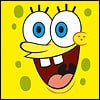

In [21]:
# Read the image file
OUR_IMAGE = './Sponge.jpg'
#OUR_IMAGE = '../images/TechBBQ.jpg'
image = Image.open(OUR_IMAGE)
image

The algorithm expects the data stored into a data frame. Each pixel is presented by two coordinates and three colors in the RGB schema: red, green, and Blue, each measured with a value between 0 and 255.

In [22]:
image.size

(100, 100)

In [23]:
pix_array = np.array(image)
pix_array

array([[[  0,   2,   0],
        [ 50,  50,  22],
        [ 21,  12,   0],
        ...,
        [ 29,   5,   0],
        [ 68,  53,  12],
        [ 10,   1,   0]],

       [[ 36,  40,   7],
        [197, 196, 140],
        [227, 217, 119],
        ...,
        [226, 205, 116],
        [207, 195, 135],
        [ 40,  34,   0]],

       [[ 19,  21,   0],
        [229, 227, 116],
        [255, 247,  84],
        ...,
        [255, 246, 106],
        [237, 231, 133],
        [ 21,  18,   0]],

       ...,

       [[ 32,   3,   0],
        [231, 208, 114],
        [255, 248, 103],
        ...,
        [242, 238,  77],
        [232, 220, 120],
        [ 32,  20,   0]],

       [[ 69,  49,  12],
        [206, 191, 134],
        [231, 221, 126],
        ...,
        [234, 223, 115],
        [210, 195, 130],
        [ 51,  37,   0]],

       [[ 13,   0,   0],
        [ 50,  38,   0],
        [ 32,  25,   0],
        ...,
        [ 35,  20,   0],
        [ 59,  42,   0],
        [ 15,   0,   0]]

In [24]:
# Alternativ way to get the pixel color values
pixels = image.load()
pixels[20,10]

(161, 176, 23)

In [25]:
# Convert the pixels into pandas dataframe, add the coordinates and the RGB values together
df = pd.DataFrame(
    [[x, y, pixels[x, y][0], pixels[x, y][1], pixels[x, y][2]]
        for x in range(image.size[0])
        for y in range(image.size[1])
     ],
    columns=['x', 'y', 'r', 'g', 'b']
)

In [26]:
df.head()

,x,y,r,g,b
0,0,0,0,2,0
1,0,1,36,40,7
2,0,2,19,21,0
3,0,3,26,22,0
4,0,4,38,26,0


# 3. Training model

In [27]:
# Train mean-shift model with the data frame
imodel = MeanShift()
imodel.fit(df)

MeanShift()

In [29]:
# See the clusters and cluster centers
imodel.cluster_centers_

array([[ 47.70759436,  52.77216917, 240.31529483, 228.24223132,
         26.84629377],
       [ 53.94009217,  52.35714286,  63.34274194,  33.24251152,
         15.11002304]])

In [31]:
len(imodel.cluster_centers_)

2

In [32]:
len(imodel.labels_)

10000

In [33]:
# Create a function to iterate through the data and create clusters
# Remember the variables cluster_centers_ and labels_ from last time?
def image_clusters(model, output, MY_IMAGE):
    # for each cluster
    for i in range(len(model.cluster_centers_)):
        image = Image.open(MY_IMAGE)
        pixels = image.load()
        # for each pixel
        for j in range(len(df)):
            if (model.labels_[j] != i):
                # make the rest white
                pixels[int(df['x'][j]), int(df['y'][j])] = (255, 255, 255)
        image.save(output + str(i) + '.jpg')       

In [35]:
image_clusters(imodel, 'meanshift_cluster', OUR_IMAGE)

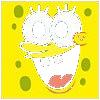

In [36]:
clustered_image0 = Image.open('meanshift_cluster0.jpg')
clustered_image0

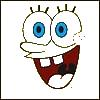

In [37]:
clustered_image1 = Image.open('meanshift_cluster1.jpg')
clustered_image1

# 4 Validating the model with k-means

In [38]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(df)
    model.fit(df)
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [90.14501916724346, 63.34585945064745, 56.91426840308914, 53.69120185330775, 49.18958308233, 42.85719975707411, 40.71333825113174, 38.80298860691703]


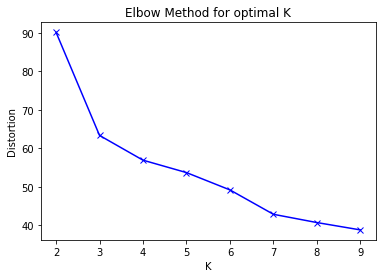

In [39]:
# Plot the elbow
plt.title('Elbow Method for optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [59]:
# K-means model fitting with specified number of clusters
k_means_model = KMeans(n_clusters=7)
k_means_model.fit(df)

KMeans(n_clusters=7)

In [60]:
# Create image clusters
image_clusters(k_means_model, 'kmeans_cluster', OUR_IMAGE)

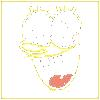

In [61]:
clustered_image0 = Image.open('kmeans_cluster0.jpg')
clustered_image0

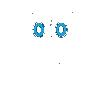

In [62]:
clustered_image1 = Image.open('kmeans_cluster1.jpg')
clustered_image1

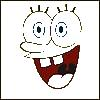

In [63]:
clustered_image2 = Image.open('kmeans_cluster2.jpg')
clustered_image2

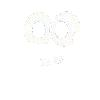

In [64]:
clustered_image3 = Image.open('kmeans_cluster3.jpg')
clustered_image3

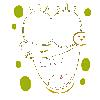

In [65]:
clustered_image4 = Image.open('kmeans_cluster4.jpg')
clustered_image4

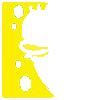

In [66]:
clustered_image5 = Image.open('kmeans_cluster5.jpg')
clustered_image5

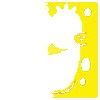

In [67]:
clustered_image6 = Image.open('kmeans_cluster6.jpg')
clustered_image6

In [69]:
#clustered_image7 = Image.open('kmeans_cluster7.jpg')
#clustered_image7